Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-2-f1565cee53d5>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


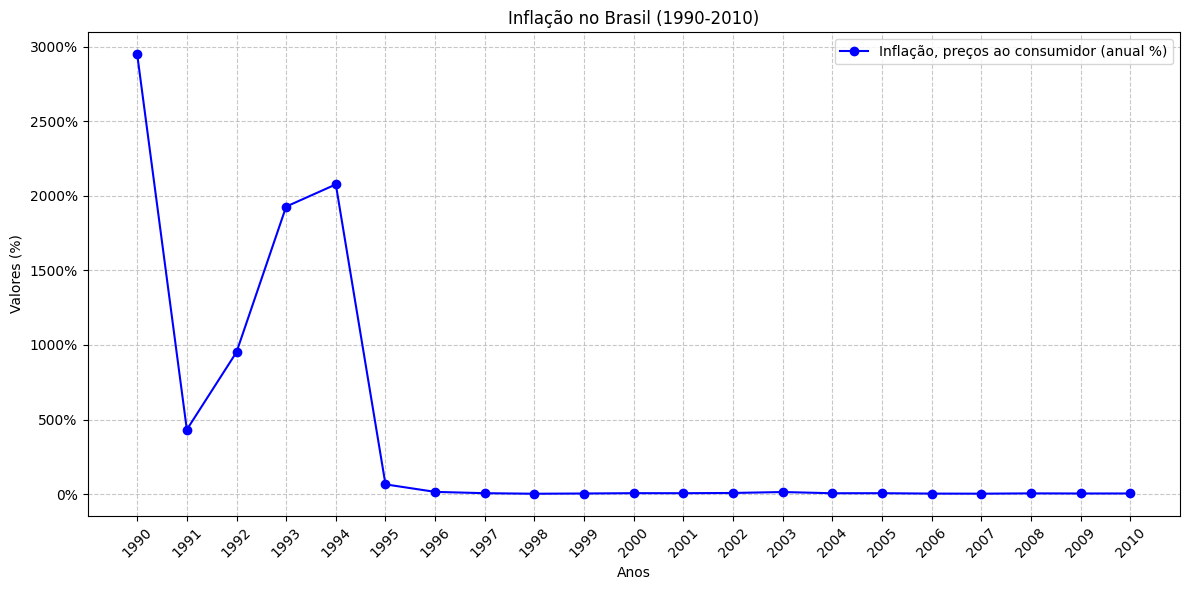

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

def mount_drive():
    drive.mount('/content/gdrive')

def load_data(path, dataset):
    try:
        df = pd.read_csv(path + dataset, sep=';', decimal=',')
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Arquivo não encontrado na pasta. {path + dataset}")

def analyze_data(df, indicator, country_code, years):
    columns = ['Country Code'] + years
    filtered_data = df[df['Indicator Name'].str.contains(indicator)][columns]
    filtered_data = filtered_data[filtered_data['Country Code'] == country_code]

    if filtered_data.empty:
        raise ValueError("Nenhum dado encontrado para os critérios especificados.")

    return filtered_data[years]

def plot_graph(data, label, years):
    plt.figure(figsize=(12, 6))
    plt.plot(years, data.values[0], label=label, marker='o', linestyle='-', color='b')
    plt.xlabel('Anos')
    plt.ylabel('Valores (%)')
    plt.title('Inflação no Brasil (1990-2010)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])
    plt.tight_layout()
    plt.show()

# Configurações
path = '/content/gdrive/MyDrive/'
dataset = 'wdi_paises_america_sul_series_validas.csv'
years = [str(year) for year in range(1990, 2011)]

# Montar o Google Drive
mount_drive()

# Carregar o conjunto de dados
df = load_data(path, dataset)

# Analisar os dados para a inflação no Brasil
try:
    inflation_data = analyze_data(df, 'Inflation, consumer prices', 'BRA', years)

    # Plotar o gráfico de inflação
    plot_graph(inflation_data, 'Inflação, preços ao consumidor (anual %)', years)

except FileNotFoundError as e:
    print(f"Erro: {e}")
except ValueError as e:
    print(f"Erro: {e}")

